In [ ]:
LSTM - Advance Monthly Sales Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv('../input/retail-sales-clothing-clothing-accessory-stores/RSCCASN.csv',
                 index_col='DATE',
                 parse_dates=True
                )

In [3]:
df.columns=['Monthly_Sales']
df.head()

,Monthly_Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Monthly_Sales  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


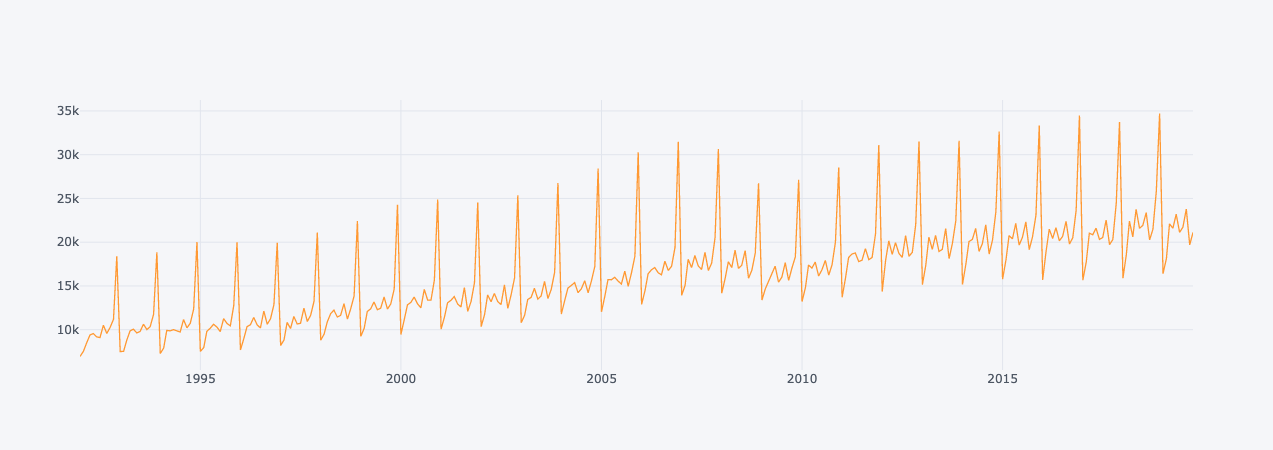

In [5]:
df.iplot()

In [6]:
len(df)

334

-Since cyle is 12 month, I will give test size more than 12 

In [7]:
test_size=18

In [8]:
test_ind= len(df)-test_size

In [9]:
train=df.iloc[:test_ind]
test=df.iloc[test_ind:]

In [10]:
train

,Monthly_Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585


In [11]:
test

,Monthly_Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [13]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [14]:
length = 12
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = 1)

In [15]:
len(generator)

304

In [16]:
generator[0]

(array([[[0.        ],
         [0.02127505],
         [0.05580163],
         [0.08942056],
         [0.09512053],
         [0.08146965],
         [0.07860151],
         [0.12979233],
         [0.09566512],
         [0.1203892 ],
         [0.15426227],
         [0.41595266]]]),
 array([[0.02047633]]))

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [18]:
n_features = 1

In [19]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [21]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

In [22]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = 1)

In [23]:
len(validation_generator) # test size - lenght (18-12)

6

In [24]:
model.fit_generator(generator, epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20


2021-11-13 11:27:16.898446: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


304/304 [==============================] - 5s 9ms/step - loss: 0.0251 - val_loss: 0.0094
Epoch 2/20
304/304 [==============================] - 3s 9ms/step - loss: 0.0161 - val_loss: 0.0026
Epoch 3/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0110 - val_loss: 0.0035
Epoch 4/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0052 - val_loss: 2.7903e-04
Epoch 5/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0026 - val_loss: 0.0058
Epoch 6/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 7/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0020 - val_loss: 4.3755e-04
Epoch 8/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0014 - val_loss: 0.0070
Epoch 9/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0018 - val_loss: 2.7555e-04
Epoch 10/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0016 - val_loss: 3.804

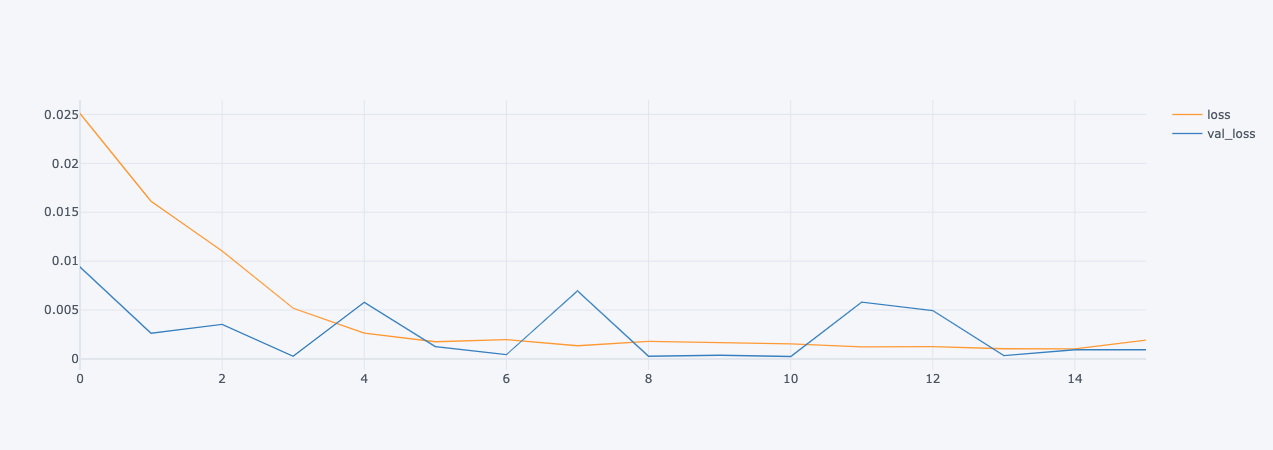

In [25]:
loss_df = pd.DataFrame(model.history.history)
loss_df.iplot()

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [28]:
y_pred = model.predict(validation_generator)
y_pred

array([[0.56440914],
       [0.498051  ],
       [0.50919396],
       [0.5524796 ],
       [0.45920223],
       [0.49423653]], dtype=float32)

In [29]:
eval_metrics(test_scaled[-6:], y_pred)

r2_score: 0.6194100790406893 
 mae: 0.0256519509730606 
 mse: 0.000943802715815089 
 rmse: 0.03072137229706852


In [30]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [31]:
eval_metrics(test_scaled, test_predictions)

r2_score: 0.6163408722481782 
 mae: 0.07480820593542473 
 mse: 0.0067628104252933224 
 rmse: 0.08223630843668338


In [32]:
true_predictions = scaler.inverse_transform(test_predictions)

In [33]:
test['Predictions'] = true_predictions

In [34]:
test

,Monthly_Sales,Predictions
DATE,,
2018-05-01,23764,20708.439
2018-06-01,21589,19718.598
2018-07-01,21919,19828.572
2018-08-01,23381,21356.247
2018-09-01,20260,19086.821
2018-10-01,21473,19473.603
2018-11-01,25831,23024.958
2018-12-01,34706,31358.749
2019-01-01,16410,15822.752


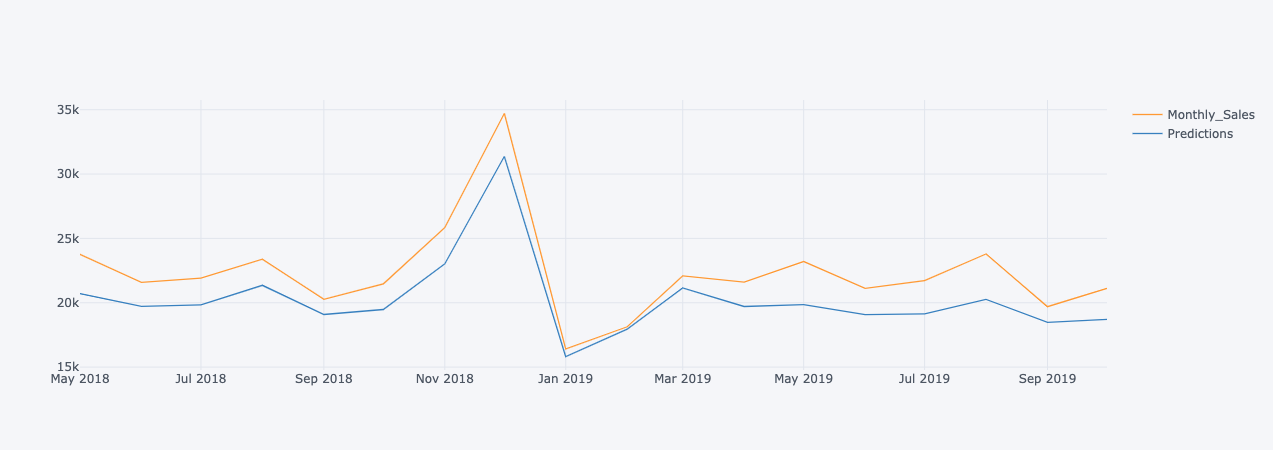

In [35]:
test.iplot()

In [36]:
eval_metrics(test['Monthly_Sales'], test['Predictions'])

r2_score: 0.6163408722481771 
 mae: 2060.517224285341 
 mse: 5130754.478158279 
 rmse: 2265.1168795800095


In [37]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [38]:
length = 12 
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 1)

In [39]:
len(df)

334

In [40]:
len(generator)

322

In [41]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit_generator(generator, epochs=15)

Epoch 1/15
322/322 [==============================] - 4s 7ms/step - loss: 0.0251
Epoch 2/15
322/322 [==============================] - 2s 7ms/step - loss: 0.0185
Epoch 3/15
322/322 [==============================] - 2s 7ms/step - loss: 0.0148
Epoch 4/15
322/322 [==============================] - 2s 7ms/step - loss: 0.0084
Epoch 5/15
322/322 [==============================] - 2s 7ms/step - loss: 0.0036
Epoch 6/15
322/322 [==============================] - 2s 7ms/step - loss: 0.0026
Epoch 7/15
322/322 [==============================] - 2s 7ms/step - loss: 0.0017
Epoch 8/15
322/322 [==============================] - 2s 7ms/step - loss: 0.0017
Epoch 9/15
322/322 [==============================] - 2s 7ms/step - loss: 0.0022
Epoch 10/15
322/322 [==============================] - 3s 8ms/step - loss: 0.0012
Epoch 11/15
322/322 [==============================] - 2s 7ms/step - loss: 0.0012
Epoch 12/15
322/322 [==============================] - 2s 7ms/step - loss: 0.0013
Epoch 13/15
322/322 [====

In [42]:
scaled_full_data.shape

(334, 1)

In [43]:
scaled_full_data[-length:].shape

(12, 1)

In [44]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 24

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

In [45]:
forecast = scaler.inverse_transform(forecast)

In [46]:
forecast_index = pd.date_range(start = '2019-11-01', periods = periods, freq = 'MS')

In [47]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

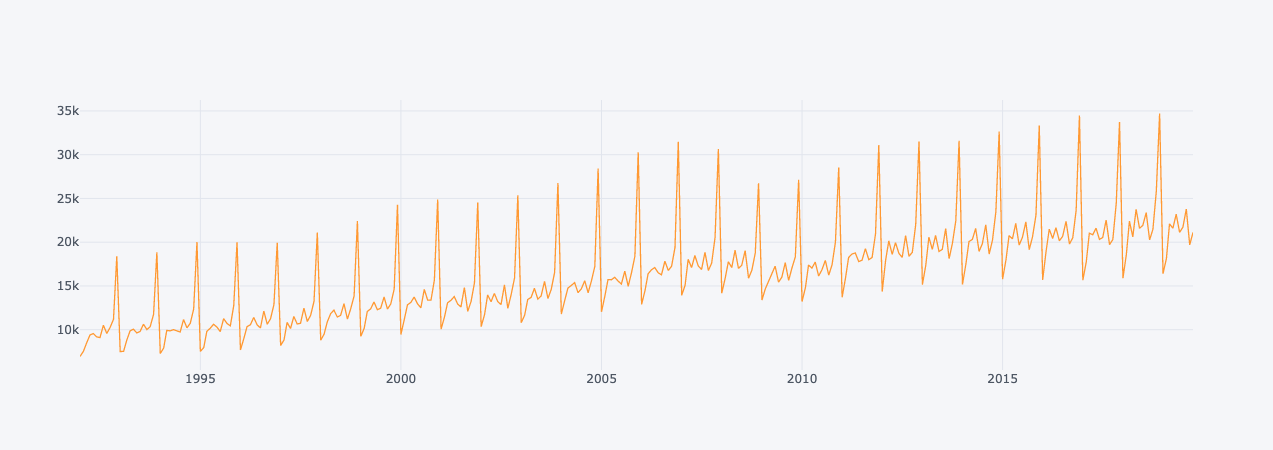

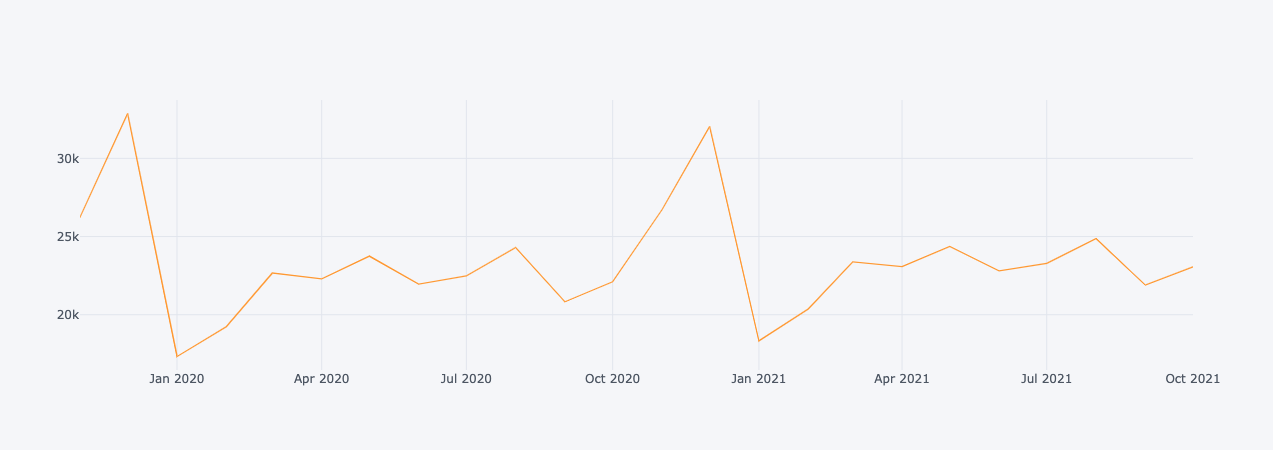

In [48]:
df.iplot()
forecast_df.iplot()

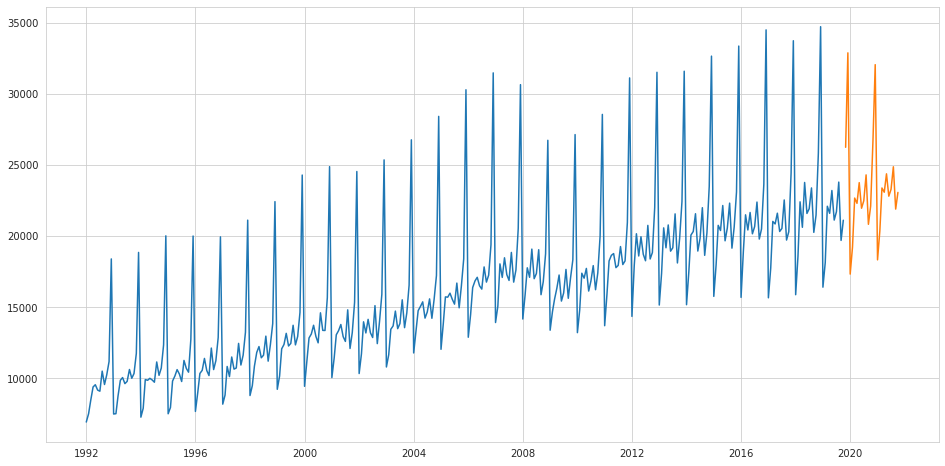

In [49]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Monthly_Sales'])
plt.plot(forecast_df.index, forecast_df['Forecast'])
#plt.plot(forecast_index, forecast)

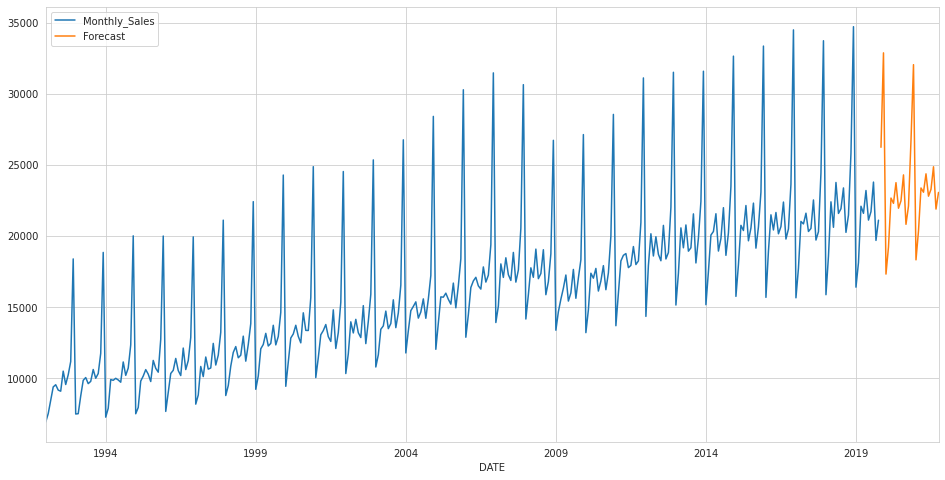

In [50]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(576.0, 611.0)

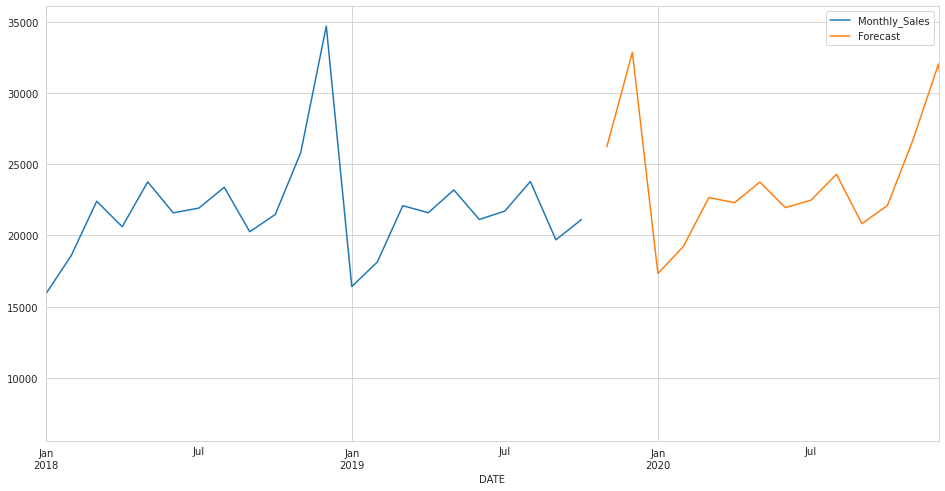

In [51]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2020-12-01')